#IMPORTING MODULES


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#IMAGE IMPORTING AND PREPROCESSING

In [ ]:
train_dir = '/content/drive/MyDrive/TRAIN'
test_dir = '/content/drive/MyDrive/TEST'

In [ ]:
image_height = 64
image_width = 64
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert image to RGB format
    image = cv2.resize(image, (image_height, image_width))  # Resize image
    image = image / 255.0  # Normalize image pixels to the range [0, 1]
    return image
def load_images_from_directory(directory):
    images = []
    labels = []
    for class_dir in os.listdir(directory):
        class_path = os.path.join(directory, class_dir)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                if filename.endswith('.jpg') or filename.endswith('.png'):
                    image_path = os.path.join(class_path, filename)
                    image = preprocess_image(image_path)
                    images.append(image)
                    labels.append(class_dir)
    return images, labels

In [ ]:
# Load images and labels from the training directory
train_images, train_labels = load_images_from_directory(train_dir)

# Load images and labels from the test directory
test_images, test_labels = load_images_from_directory(test_dir)

# Combine training and test images and labels
X_train = np.array(train_images)
y_train = np.array(train_labels)
X_test = np.array(test_images)
y_test = np.array(test_labels)


In [ ]:
label_to_index = {'happy': 0, 'neutral': 1, 'sad': 2}
y_train_categorical = tf.keras.utils.to_categorical([label_to_index[label] for label in y_train])
y_test_categorical = tf.keras.utils.to_categorical([label_to_index[label] for label in y_test])

#MODEL BUILDING

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64,64, 3)))#1
model.add(layers.Dropout(0.15))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 dropout_2 (Dropout)         (None, 29, 29, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                  

In [ ]:
import matplotlib.pyplot as plt
optimizer_name = 'adam'

# Compile and train the model with the selected optimizer
model.compile(optimizer=optimizer_name, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_categorical, epochs=25, batch_size=24, validation_data=(X_test, y_test_categorical),steps_per_epoch=100)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(f'Training Accuracy vs. Validation Accuracy ({optimizer_name})')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(f'Training Loss vs. Validation Loss ({optimizer_name})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

Epoch 1/25
100/100 [==============================] - 30s 287ms/step - loss: 1.1007 - accuracy: 0.3537 - val_loss: 1.0968 - val_accuracy: 0.3322
Epoch 2/25
100/100 [==============================] - 29s 291ms/step - loss: 1.0955 - accuracy: 0.3771 - val_loss: 1.0926 - val_accuracy: 0.3191
Epoch 3/25
100/100 [==============================] - 28s 282ms/step - loss: 1.0901 - accuracy: 0.3810 - val_loss: 1.0898 - val_accuracy: 0.4145
Epoch 4/25
100/100 [==============================] - 29s 286ms/step - loss: 1.0820 - accuracy: 0.3996 - val_loss: 1.0787 - val_accuracy: 0.3914
Epoch 5/25
100/100 [==============================] - 29s 294ms/step - loss: 1.0701 - accuracy: 0.4279 - val_loss: 1.0824 - val_accuracy: 0.3849
Epoch 6/25
100/100 [==============================] - 28s 284ms/step - loss: 1.0594 - accuracy: 0.4329 - val_loss: 1.0630 - val_accuracy: 0.4441
Epoch 7/25
100/100 [==============================] - 28s 281ms/step - loss: 1.0234 - accuracy: 0.4676 - val_loss: 1.0269 - val_ac

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

10/10 [==============================] - 1s 60ms/step - loss: 2.1781 - accuracy: 0.6579
Test Loss: 2.1781, Test Accuracy: 0.6579


#MODEL TESTING

1/1 [==============================] - 0s 227ms/step


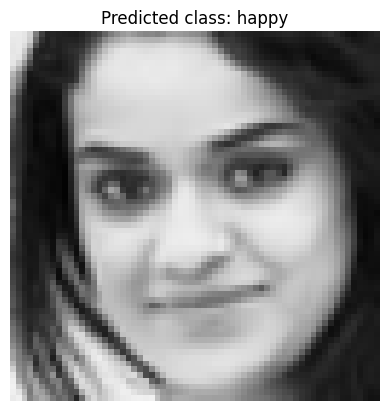

In [ ]:
image_path = '/content/drive/MyDrive/TEST/happy/im1.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (image_height, image_width))
image = image / 255.0
image = np.expand_dims(image, axis=0)

# Make predictions on the new image
predictions = model.predict(image)
predicted_class_index = np.argmax(predictions[0])
class_labels = ['happy', 'neutral', 'sad']
predicted_class_label = class_labels[predicted_class_index]

# Display the image and predicted class
plt.imshow(image[0])
plt.axis('off')
plt.title('Predicted class: ' + predicted_class_label)
plt.show()

10/10 [==============================] - 1s 104ms/step


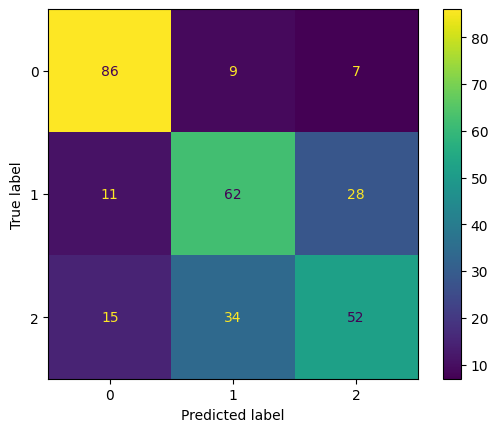

In [ ]:
# Get predictions on the test data
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Get actual labels from the test data
y_actual = np.argmax(y_test_categorical, axis=1)

# Compute confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_actual, y_pred_labels)

# Plot confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

10/10 [==============================] - 1s 58ms/step


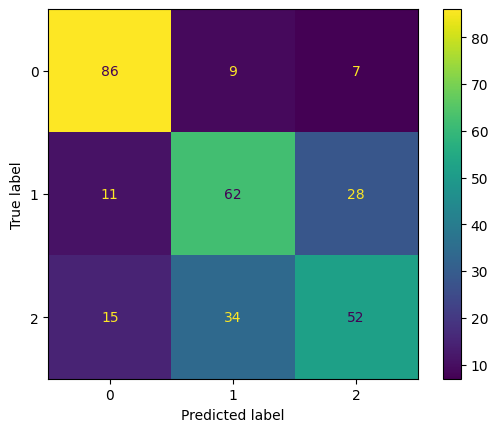

              precision    recall  f1-score   support

       happy       0.77      0.84      0.80       102
     neutral       0.59      0.61      0.60       101
         sad       0.60      0.51      0.55       101

    accuracy                           0.66       304
   macro avg       0.65      0.66      0.65       304
weighted avg       0.65      0.66      0.65       304



In [ ]:
y_pred_labels = np.argmax(y_pred, axis=1)
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Get actual labels from the test data
y_actual = np.argmax(y_test_categorical, axis=1)

# Compute confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_actual, y_pred_labels)

# Plot confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Generate classification report
classification_rep = classification_report(y_actual, y_pred_labels, target_names=class_labels)

# Print classification report
print(classification_rep)

#XAI

In [ ]:
# Function to apply Grad-CAM
def grad_cam(model, image, layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image)
        class_index = np.argmax(predictions[0])
        loss = predictions[:, class_index]

    output = conv_outputs[0]
    grads = tape.gradient(loss, conv_outputs)[0]
    guided_grads = tf.cast(output > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads
    weights = tf.reduce_mean(guided_grads, axis=(0, 1))

    cam = np.dot(output, weights)
    cam = cv2.resize(cam, (image.shape[2], image.shape[1]))
    cam = np.maximum(cam, 0)
    cam = cam / np.max(cam)

    return cam

In [ ]:
index_to_label = {0: 'happy', 1: 'neutral', 2: 'sad'}

1/1 [==============================] - 0s 22ms/step


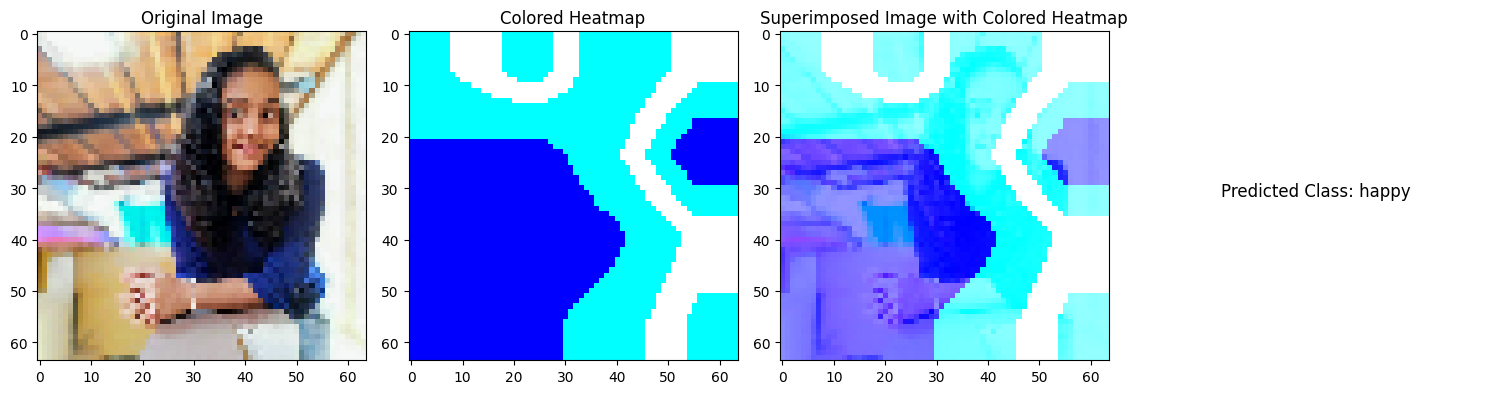

In [ ]:
image_path = '/content/WhatsApp Image 2023-06-24 at 11.24.48 PM.jpeg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize the image to the desired dimensions
image_height, image_width = 64, 64
image = cv2.resize(image, (image_width, image_height))

# Preprocess the image
image = image / 255.0
image = np.expand_dims(image, axis=0)

# Apply Grad-CAM to the model
heatmap = grad_cam(model, image, 'conv2d_7')
heatmap = cv2.resize(heatmap, (image.shape[2], image.shape[1]))

# Normalize the heatmap between 0 and 255
heatmap = np.uint8(255 * heatmap)

# Apply color map to the heatmap
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
heatmap = heatmap.astype(np.float32)  # Explicitly specify the data type as float32

# Superimpose the heatmap on the original image
superimposed_img = cv2.addWeighted(image[0], 0.6, heatmap, 0.4, 0, dtype=cv2.CV_32F)

# Get the predicted class index
predictions = model.predict(image)
predicted_class_index = np.argmax(predictions[0])

# Map the class index to the label
index_to_label = {0: 'happy', 1: 'neutral', 2: 'sad'}
predicted_class_label = index_to_label[predicted_class_index]
heatmap = heatmap.astype(np.uint8)

# Apply color map to the heatmap
heatmap_colored = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

heatmap_colored = cv2.applyColorMap(heatmap, cv2.COLORMAP_HOT)
heatmap_colored = heatmap_colored.astype(np.float32)  # Explicitly specify the data type as float32

# Superimpose the colored heatmap on the original image
superimposed_img_colored = cv2.addWeighted(image[0], 0.6, heatmap_colored, 0.4, 0, dtype=cv2.CV_32F)

# Display the original image, colored heatmap, superimposed image, and predicted class
fig, ax = plt.subplots(1, 4, figsize=(15, 4))
ax[0].imshow(image[0])
ax[0].set_title('Original Image')
ax[1].imshow(heatmap_colored)
ax[1].set_title('Colored Heatmap')
ax[2].imshow(superimposed_img_colored)
ax[2].set_title('Superimposed Image with Colored Heatmap')
ax[3].axis('off')
ax[3].text(0.5, 0.5, f'Predicted Class: {predicted_class_label}', fontsize=12, ha='center')

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 20ms/step


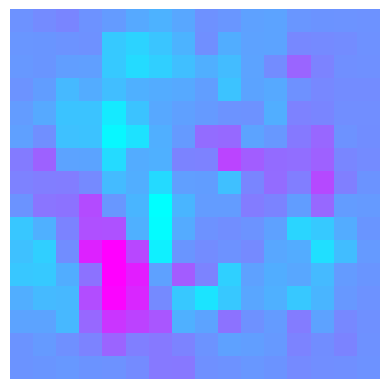

In [ ]:
def occlusion_saliency(model, image, target_class, patch_size, stride):
    height, width, _ = image.shape
    saliency_map = np.zeros((height, width))

    for y in range(0, height, stride):
        for x in range(0, width, stride):
            occluded_image = image.copy()
            occluded_image[y:y+patch_size, x:x+patch_size, :] = 0

            prediction = model.predict(np.expand_dims(occluded_image, axis=0))
            probability = prediction[0][target_class]

            saliency_map[y:y+patch_size, x:x+patch_size] = probability

    return saliency_map


# Load and preprocess the input image
input_image = preprocess_image('/content/WhatsApp Image 2023-06-24 at 11.24.48 PM.jpeg')

# Expand dimensions to match the model's input shape
input_image = np.expand_dims(input_image, axis=0)

# Set parameters for occlusion saliency
target_class = 0  # Index of the target class for which saliency is computed
patch_size = 8  # Size of the occlusion patch
stride = 4  # Stride for the occlusion patch

# Compute occlusion saliency
saliency_map = occlusion_saliency(model, input_image[0], target_class, patch_size, stride)

# Normalize the saliency map
saliency_map = (saliency_map - np.min(saliency_map)) / (np.max(saliency_map) - np.min(saliency_map))

# Plot the saliency map
plt.imshow(saliency_map, cmap='cool', interpolation='nearest')
plt.axis('off')
plt.show()